In [20]:
import os
from mesa_web import read_profile, read_history, find_read_profile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize, curve_fit
import astropy.units as u
import astropy.constants as const
import math
import statistics
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.cm
import scipy.signal as signal
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.colors import (ListedColormap, LinearSegmentedColormap)

In [2]:
mesa_fe_h_sun_path = 'MESA-Web_Job_09192318184'
mesa_fe_h_path = 'MESA-Web_Job_09192318186'

In [21]:
trimmed_history_fehsun = read_history(os.path.join(mesa_fe_h_sun_path, 'trimmed_history.data'))
trimmed_history_feh = read_history(os.path.join(mesa_fe_h_path, 'trimmed_history.data'))

In [63]:
trimmed_history_fehsun['log_center_T']

array([5.47703373, 5.47703396, 5.47703396, ..., 7.41058135, 7.40943494,
       7.40842795])

Text(0.5, 1.0, 'Diagrama de Hertzsprung-Russell para [Fe/H] = -1')

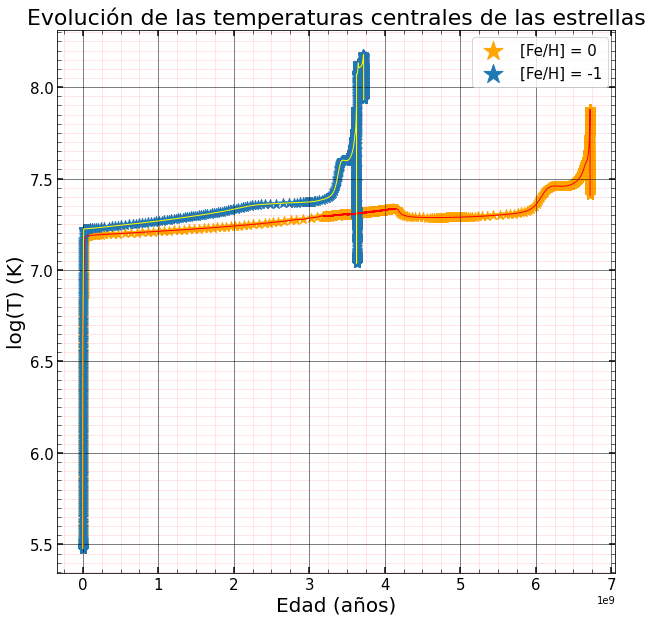

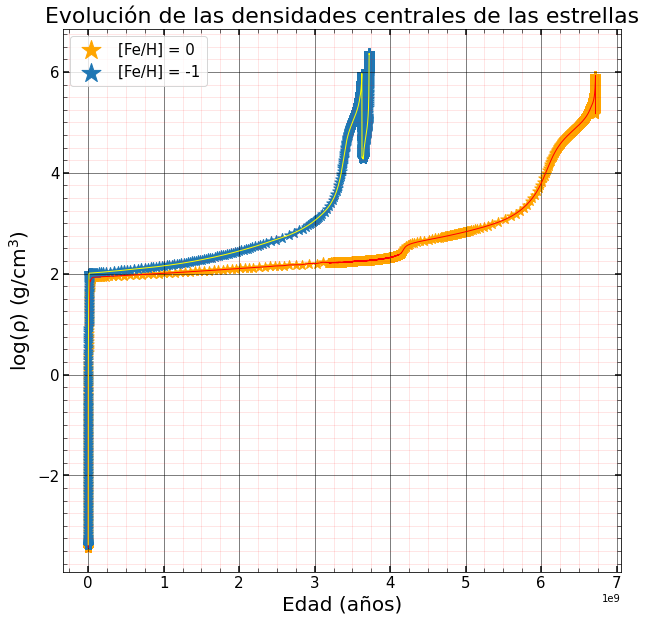

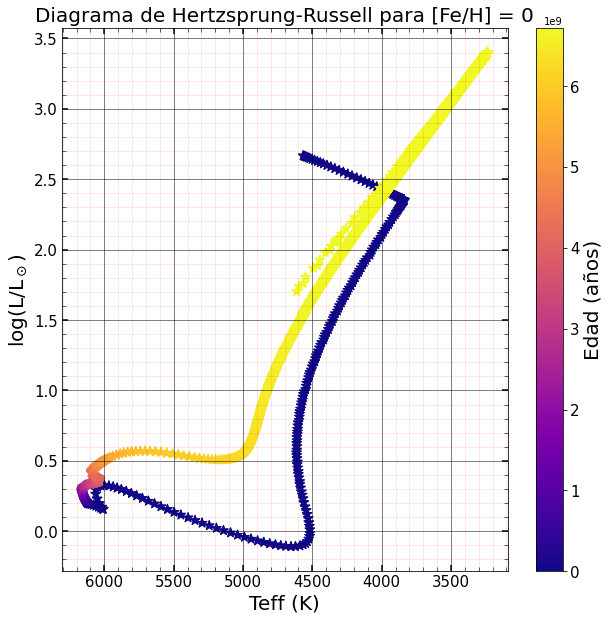

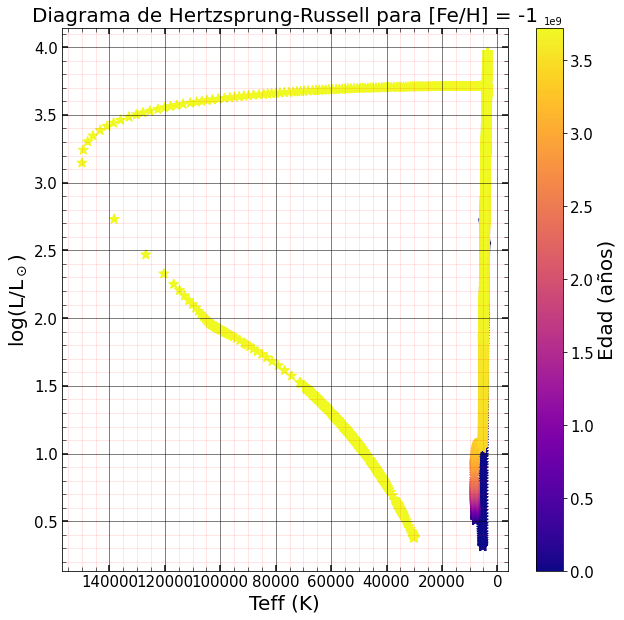

In [91]:
# graph of the evolution of the central temperature of the sunlike star

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(trimmed_history_fehsun['star_age'], trimmed_history_fehsun['log_center_T'], marker="*", s=100, c='orange', label='[Fe/H] = 0')
# slim plot over it
ax.plot(trimmed_history_fehsun['star_age'], trimmed_history_fehsun['log_center_T'], c='red', linewidth=1)

ax.scatter(trimmed_history_feh['star_age'], trimmed_history_feh['log_center_T'], marker="*", s=100, label='[Fe/H] = -1')
ax.plot(trimmed_history_feh['star_age'], trimmed_history_feh['log_center_T'], c='yellow', linewidth=1)
ax.set_xlabel('Edad (años)', fontsize=20)
ax.xaxis.set_minor_locator(MultipleLocator(250000000))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
              length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
              grid_linewidth=0.5)

ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')

ax.grid(True, which='both')
ax.set_ylabel('log(T) (K)', fontsize=20)
ax.set_title('Evolución de las temperaturas centrales de las estrellas', fontsize=22)
ax.legend(fontsize=15, markerscale=2)

# graph of the evolution of the central density

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(trimmed_history_fehsun['star_age'], trimmed_history_fehsun['log_center_Rho'], marker="*", s=100, c='orange', label='[Fe/H] = 0')
# slim plot over it
ax.plot(trimmed_history_fehsun['star_age'], trimmed_history_fehsun['log_center_Rho'], c='red', linewidth=1)

ax.scatter(trimmed_history_feh['star_age'], trimmed_history_feh['log_center_Rho'], marker="*", s=100, label='[Fe/H] = -1')
ax.plot(trimmed_history_feh['star_age'], trimmed_history_feh['log_center_Rho'], c='yellow', linewidth=1)

ax.set_xlabel('Edad (años)', fontsize=20)
ax.xaxis.set_minor_locator(MultipleLocator(250000000))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')

ax.grid(True, which='both')
ax.set_ylabel(r'log(ρ) (g/cm$^3$)', fontsize=20)
ax.set_title('Evolución de las densidades centrales de las estrellas', fontsize=22)
ax.legend(fontsize=15, markerscale=2)

# Hertzprung-Russell diagram only for feh = 0, but i want the color to be the age of the star, and the temperatures not to be log

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(10 ** trimmed_history_fehsun['log_Teff'], trimmed_history_fehsun['log_L'], marker="*", s=100, c=trimmed_history_fehsun['star_age'], cmap='plasma')
ax.set_xlabel('Teff (K)', fontsize=20)
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
# colorbar for the age of the star
cbar = fig.colorbar(ax.scatter(10 ** trimmed_history_fehsun['log_Teff'], trimmed_history_fehsun['log_L'], marker="*", s=100, c=trimmed_history_fehsun['star_age'], cmap='plasma'))
cbar.set_label('Edad (años)', fontsize=20)
cbar.ax.tick_params(labelsize=15)

ax.invert_xaxis()

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')

ax.grid(True, which='both')
ax.set_ylabel(r'log(L/L$_\odot$)', fontsize=20)
ax.set_title('Diagrama de Hertzsprung-Russell para [Fe/H] = 0', fontsize=20)


# Hertzprung-Russell diagram only for feh = -1, but i want the color to be the age of the star, and the temperatures not to be log

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(10 ** trimmed_history_feh['log_Teff'], trimmed_history_feh['log_L'], marker="*", s=100, c=trimmed_history_feh['star_age'], cmap='plasma')
ax.set_xlabel('Teff (K)', fontsize=20)
ax.xaxis.set_minor_locator(MultipleLocator(5000))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
# colorbar for the age of the star
cbar = fig.colorbar(ax.scatter(10 ** trimmed_history_feh['log_Teff'], trimmed_history_feh['log_L'], marker="*", s=100, c=trimmed_history_feh['star_age'], cmap='plasma'))
cbar.set_label('Edad (años)', fontsize=20)
cbar.ax.tick_params(labelsize=15)

ax.invert_xaxis()

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')

ax.grid(True, which='both')
ax.set_ylabel(r'log(L/L$_\odot$)', fontsize=20)
ax.set_title('Diagrama de Hertzsprung-Russell para [Fe/H] = -1', fontsize=20)




In [9]:
# show all files in the directory
files_feh_sun = os.listdir(mesa_fe_h_sun_path)
files_feh = os.listdir(mesa_fe_h_path)

# take out the files that are not the profiles

# for the sun
profiles_feh_sun_path = []
for file in files_feh_sun:
    if file.endswith('.index'):
        continue
    else: 
        if file.startswith('profile'):
            profiles_feh_sun_path.append(file)

# for the feh
profiles_feh_path = []
for file in files_feh:
    if file.endswith('.index'):
        continue
    else: 
        if file.startswith('profile'):
            profiles_feh_path.append(file)
